Local Potential Plotter
Eric Welch 2021

This script takes planar.dat output files from MacroDensity Planar Average outputs (cite MD) and plots them in size dependent, H-passivation dependent and dipole dependent plots (9 in total)

In [11]:
# import necessary libraries
# -*- coding: utf-8 -*-
from __future__ import unicode_literals # this is so one can use the angstrom symbol in plot labels \u212B
import numpy as np # numpy is used to help create the x-axis values as the parsing program used to extract the LOCPOT data only obtains the y-axis values
import matplotlib.pyplot as plt # pyplot is used fmior plotting
import matplotlib as mpl
import glob # glob is used extract the names of each file for plotting uses
import os

In [12]:
# get file names and create a dictionary with them
# replace 'LPOT*' with the filenames one wishes to plot
names = sorted(glob.glob('LPOT*')) # obtain the name of each file in with starting with LPOT
namesDict = {i : names[i] for i in range(0, len(names))} # dictionary with values = names and keys = 0 through 35, numbering each values
names_dic = {}
for k, v in namesDict.items():
        names_dic[v] = k # switch keys and values for easier enumeration later on

In [13]:
# parse data from file by calling parser with the argument fname = your_filename
# no need to change this section
def parser(fname): # create function parser and take in the value of fname when calling the function
        y = [] # create empty list to story y values
        f = open(fname, 'r').readlines() # open file and read lines
        for line in f: # loop over each line in the opened file
                values = [float(n) for n in line.split()] # split file lines into a list of values
                y.append(values[0]) # add values from file to y value list

        return y # returns the value of y to be used further in the code

In [14]:
# length of supercells in order 1ucC, 1ucGa, 1ucN, 3ucC, 3ucGa, 3ucN
len_cell =  [18.54, 1, 1, 55.60, 1, 1] # lengths of each supercell as a list

In [15]:
# create a list of lists containing each y axis = data from each LPOT file
# no need to change this section
y = [] # preallocate space for y list
index = 0 # dummy variable to increment while loop
while index < len(names): # loop over all filenames
	t = parser(names[index]) # call function to parse LPOT files
	y.append(t) # add each LPOT column of data to y list
	index += 1 # increment loop by 1

In [16]:
# create a list of lists containing each x axis = evenly spaced line-mesh derived from length of supercell c-axis length
# no need to change this section
x = [] # preallocate space for x list
index = 0 # dummy variable to loop over len_cell values
count = 0 # dummy variable to loop over all filenames
for j in range(0,6): # create 6 loops for the 6 groups of x (defined in the order of len_cell)
	for i in range(count,count+6): # loop over 6 states to create each subgrouping of x values
		smax = len_cell[index] # value of c-axis from supercell
		smesh = smax / len(y[i]) # smax divided by the number of values on yaxis (matrices need to be same size for plotting)
		s = np.arange(0, smax, smesh) # create an array of evenly spaced x values for plots
		x.append(s) # add each column of data to the x list

	index += 1 # increase index by 1 to change to next len_cell value
	count += 6 # increase count by 6 to go to next grouping of files/y values

In [17]:
# create lists of independent and dependent variables for each system
# no need to change this section
def get_data(*args): # create a function with a variable number of arguments
	a, b = [], [] # create empty lists for the x and y values
	for arg in args: # loop over all values in a and b (x and y)
		a.append(x[names_dic[arg]]) # add x values to a list
		b.append(y[names_dic[arg]]) # add y values to b list

	return a, b # return the values to be plotted

In [18]:
# call the get_data function
# this section will change to reflect your file names
# may also want to rename your variables to reflect something that makes sense for your systems
# size dependent
sCx, sCy = get_data('LPOT_1uc-C-noH-nodip', 'LPOT_3uc-C-noH-nodip')
sGax, sGay = get_data('LPOT_1uc-GaN-gaterm-noH-nodip', 'LPOT_3uc-GaN-gaterm-noH-nodip')
sNx, sNy = get_data('LPOT_1uc-GaN-nterm-noH-nodip', 'LPOT_3uc-GaN-nterm-noH-nodip')

# s depenedent
hCx, hCy = get_data('LPOT_3uc-C-noH-nodip', 'LPOT_3uc-C-withH-nodip')
hGax, hGay = get_data('LPOT_3uc-GaN-gaterm-noH-nodip', 'LPOT_3uc-GaN-gaterm-withH-nodip')
hNx, hNy = get_data('LPOT_3uc-GaN-nterm-noH-nodip', 'LPOT_3uc-GaN-nterm-withH-nodip')

# dipole dependent
dCx, dCy = get_data('LPOT_3uc-C-withH-nodip', 'LPOT_3uc-C-withH-Edip', 'LPOT_3uc-C-withH-EVdip')
dGax, dGay = get_data('LPOT_3uc-GaN-gaterm-withH-nodip', 'LPOT_3uc-GaN-gaterm-withH-Edip', 'LPOT_3uc-GaN-gaterm-withH-EVdip')
dNx, dNy = get_data('LPOT_3uc-GaN-nterm-withH-nodip', 'LPOT_3uc-GaN-nterm-withH-Edip', 'LPOT_3uc-GaN-nterm-withH-EVdip')

In [19]:
# plotter function
# can change if you want to change plots
def plotter(x,y,name,*args):
	plt.rc('font', family='serif')
	plt.rc('xtick', labelsize='x-small')
	plt.rc('ytick', labelsize='x-small')
	

	labels = []
	for arg in args:
		labels.append(arg)

	fig = plt.figure()
	ax1 = fig.add_subplot(1,1,1)
	ax2 = ax1.twiny()

	
	if len(x) < 3:
		l1 = ax1.plot(x[0],y[0], 'r-', label=labels[0])
		l2 = ax2.plot(x[1],y[1], 'b-', label=labels[1])
		leg = l1 + l2
		labs = [l.get_label() for l in leg]
		ax1.legend(leg, labs, loc='lower right')

	elif len(x) == 3:
		l1 = ax1.plot(x[0],y[0], 'r-', label=labels[0])
		l2 = ax2.plot(x[1],y[1], 'b-', label=labels[1])
		l3 = ax2.plot(x[2],y[2], 'b--', label=labels[2])
		leg = l1 + l2 + l3
		labs = [l.get_label() for l in leg]
		ax1.legend(leg, labs, loc='lower right')

	ax1.set_xlabel('c-axis (\u212B)')
	ax1.set_ylabel('Potential (eV)')
	ax2.set_xlabel('c-axis (\u212B)')
	ax1.tick_params(axis='x',which='both',direction='in',colors='red')
	ax2.tick_params(axis='x',which='both',direction='in',colors='blue')
	ax1.xaxis.label.set_color('red')
	ax2.xaxis.label.set_color('blue')
	ax2.spines["bottom"].set_color('red')
	ax2.spines["top"].set_color('blue')
	ax2.get_shared_y_axes()
	plt.tight_layout()
	plt.show()
	fname = name + '.png'
	plt.close()
	
	return fig, fname

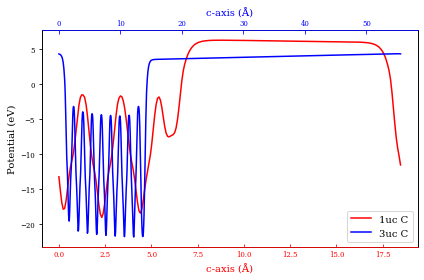

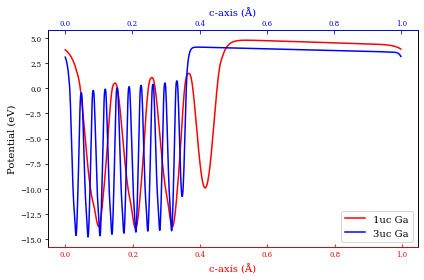

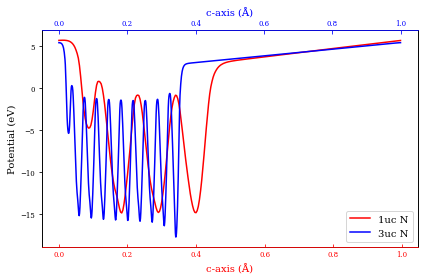

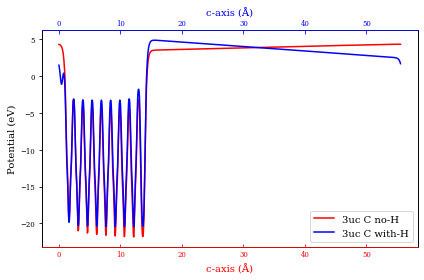

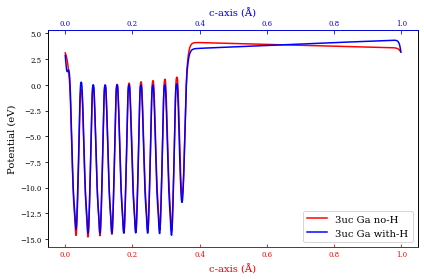

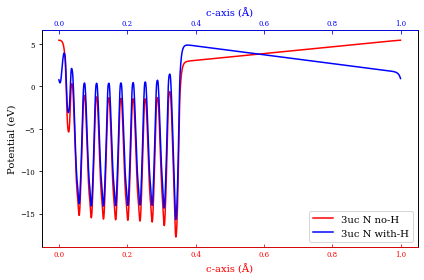

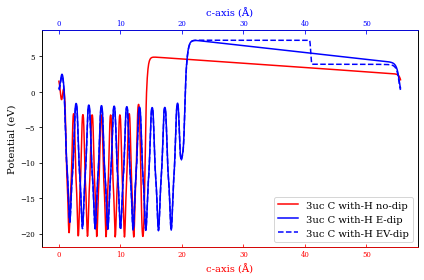

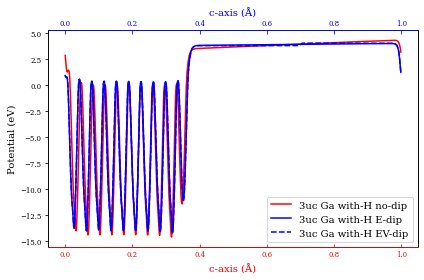

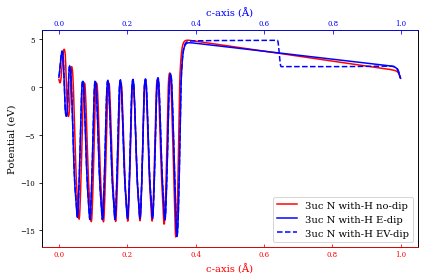

In [20]:
# call plotter function and save figures as png
# need to change file names and variable names if one changed them
fig1, fname1 = plotter(sCx,sCy,'C_size-dep', '1uc C', '3uc C')
fig1.savefig(fname1)
fig2, fname2 = plotter(sGax,sGay,'Ga_size-dep', '1uc Ga', '3uc Ga')
fig2.savefig(fname2)
fig3, fname3 = plotter(sNx,sNy,'N_size-dep', '1uc N', '3uc N')
fig3.savefig(fname3)
fig4, fname4 = plotter(hCx,hCy,'C_h-dep', '3uc C no-H', '3uc C with-H')
fig4.savefig(fname4)
fig5, fname5 = plotter(hGax,hGay,'Ga_h-dep', '3uc Ga no-H', '3uc Ga with-H')
fig5.savefig(fname5)
fig6, fname6 = plotter(hNx,hNy,'N_h-dep', '3uc N no-H', '3uc N with-H')
fig6.savefig(fname6)
fig7, fname7 = plotter(dCx,dCy,'C_dip-dep', '3uc C with-H no-dip', '3uc C with-H E-dip', '3uc C with-H EV-dip')
fig7.savefig(fname7)
fig8, fname8 = plotter(dGax,dGay,'Ga_dip-dep', '3uc Ga with-H no-dip', '3uc Ga with-H E-dip', '3uc Ga with-H EV-dip')
fig8.savefig(fname8)
fig9, fname9 = plotter(dNx,dNy,'N_dip-dep', '3uc N with-H no-dip', '3uc N with-H E-dip', '3uc N with-H EV-dip')
fig9.savefig(fname9)